Sean Kelly
10/12/20
HW09

9.1 B

In [1]:
from qiskit import QuantumCircuit, Aer, execute

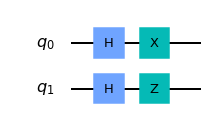

In [2]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(0)
circ.h(1)
circ.z(1)
circ.draw('mpl')

In [3]:
sim = Aer.get_backend('unitary_simulator')
res = execute(circ, sim).result()
print(res.get_unitary())

[[ 0.5+0.0000000e+00j -0.5+6.1232340e-17j  0.5-6.1232340e-17j
  -0.5+1.2246468e-16j]
 [ 0.5+0.0000000e+00j  0.5-6.1232340e-17j  0.5-6.1232340e-17j
   0.5-1.2246468e-16j]
 [-0.5+0.0000000e+00j  0.5-6.1232340e-17j  0.5-6.1232340e-17j
  -0.5+1.2246468e-16j]
 [-0.5+0.0000000e+00j -0.5+6.1232340e-17j  0.5-6.1232340e-17j
   0.5-1.2246468e-16j]]


In [4]:
#Part A output: #  1  1 -1 -1
                # -1  1  1 -1      * 1/2
                #  1  1  1  1
                # -1  1 -1  1
            
#Part B output: #  1 -1  1 -1
                #  1  1  1  1      * 1/2
  #(above)      # -1  1  1 -1
                # -1 -1  1  1

The answer from part A is different from part B. Specifically, the answer from part B is the transpose of part A. This is due to qiskit representing the order of qubits in reverse order to how they were represented in part A, which resulted in qiskit computing the tensor product of the 2 qubits in the reverse order. 

9.1 C

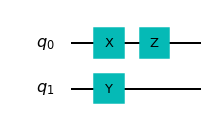

In [5]:
circ = QuantumCircuit(2)
circ.x(0)
circ.z(0)
circ.y(1)
circ.draw('mpl')

In [6]:
sim = Aer.get_backend('unitary_simulator')
res = execute(circ, sim).result()
print(res.get_unitary())
#identical to opposite tensor product as was calculated in part c (i)

[[ 0.-0.j  0.-0.j  0.-0.j  0.-1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [-0.-1.j -0.+0.j -0.+0.j -0.+0.j]]


9.2 B

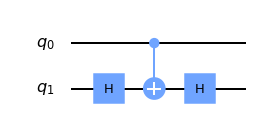

In [7]:
circ = QuantumCircuit(2)
circ.h(1)
circ.cx(0,1)
circ.h(1)
circ.draw('mpl')

In [8]:
sim = Aer.get_backend('unitary_simulator')
res = execute(circ, sim).result()
print(res.get_unitary())

[[ 1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   7.49879891e-33+6.1232340e-17j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j -2.22044605e-16-6.1232340e-17j]
 [ 0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-1.8369702e-16j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j -2.22044605e-16+6.1232340e-17j
   0.00000000e+00+0.0000000e+00j -1.00000000e+00+1.8369702e-16j]]


9.3 C

In [9]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

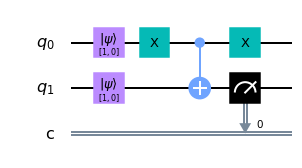

In [10]:
# Initial State: |00>

circ = QuantumCircuit(2,1)
circ.initialize([1,0],0) #initializes 1st qubit to the 0 state
circ.initialize([1,0],1) #initializes 2nd qubit to the 0 state

circ.x(0)
circ.cx(0,1)
circ.x(0)
circ.measure(1,0)
circ.draw('mpl')

In [11]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()

print("|00> Measurement: ", res.get_counts())

|00> Measurement:  {'1': 1000}


|00>: The control qubit is zero, so the target qubit is operated on by the CNOT gate, and is flipped from the 0 to 1 state. The simulator shows that this 1 is returned with 100% probability since this operation will always happen given the |00> input.

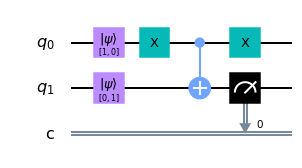

In [12]:
# Initial State: |01>

circ = QuantumCircuit(2,1)
circ.initialize([1,0],0) #initializes 1st qubit to the 0 state
circ.initialize([0,1],1) #initializes 2nd qubit to the 1 state

circ.x(0)
circ.cx(0,1)
circ.x(0)
circ.measure(1,0)
circ.draw('mpl')

In [13]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()

print("|01> Measurement: ", res.get_counts())

|01> Measurement:  {'0': 1000}


|01>: The control qubit is zero, so the target qubit is operated on by the CNOT gate, and is flipped from the 1 to 0 state. The simulator shows that this 0 is returned with 100% probability.

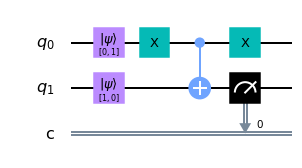

In [14]:
# Initial State: |10>

circ = QuantumCircuit(2,1)
circ.initialize([0,1],0) #initializes 1st qubit to the 1 state
circ.initialize([1,0],1) #initializes 2nd qubit to the 0 state

circ.x(0)
circ.cx(0,1)
circ.x(0)
circ.measure(1,0)
circ.draw('mpl')

In [15]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()

print("|10> Measurement: ", res.get_counts())

|10> Measurement:  {'0': 1000}


|10>: The control qubit is 1, so the target qubit is not operated on by the CNOT gate, and remains a 0. The simulator shows that this 0 is returned with 100% probability 

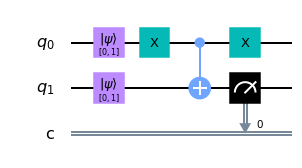

In [16]:
# Initial State: |11>

circ = QuantumCircuit(2,1)
circ.initialize([0,1],0) #initializes 1st qubit to the 1 state
circ.initialize([0,1],1) #initializes 2nd qubit to the 1 state

circ.x(0)
circ.cx(0,1)
circ.x(0)
circ.measure(1,0)
circ.draw('mpl')

In [17]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()

print("|11> Measurement: ", res.get_counts())

|11> Measurement:  {'1': 1000}


|11>: The control qubit is 1, so the target qubit is not operated on by the CNOT gate, and remains a 1. The simulator shows that this 1 is returned with 100% probability.